In [2]:
import pandas as pd


In [3]:
df = pd.read_json('/home/faisal/code/AlexRohn-96/shipvision_lewagon_backend/raw_data/shipsnet.json')

In [4]:
df.head


<bound method NDFrame.head of                                                    data  labels  \
0     [82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...       1   
1     [76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...       1   
2     [125, 127, 129, 130, 126, 125, 129, 133, 132, ...       1   
3     [102, 99, 113, 106, 96, 102, 105, 105, 103, 10...       1   
4     [78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...       1   
...                                                 ...     ...   
3995  [126, 122, 124, 138, 165, 186, 195, 199, 203, ...       0   
3996  [130, 134, 139, 128, 117, 126, 141, 147, 142, ...       0   
3997  [171, 135, 118, 140, 145, 144, 154, 165, 139, ...       0   
3998  [85, 90, 94, 95, 94, 92, 93, 96, 93, 94, 94, 9...       0   
3999  [122, 122, 126, 126, 142, 153, 174, 190, 185, ...       0   

                                      locations             scene_ids  
0       [-118.2254694333423, 33.73803725920789]  20180708_180909_0f47  
1       [-122.3322286

In [5]:
X = df['data'].tolist()

# Define y as the target vector (output labels)
y = df['labels'].values

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.95


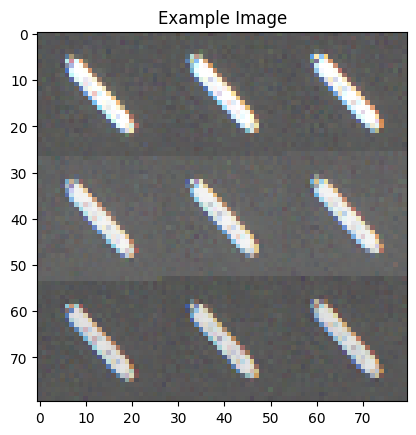

labels
0    3000
1    1000
Name: count, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize the first image
first_image = np.array(df['data'][0]).reshape(80, 80,3)
plt.imshow(first_image)
plt.title('Example Image')
plt.show()

# Check label distribution
print(df['labels'].value_counts())

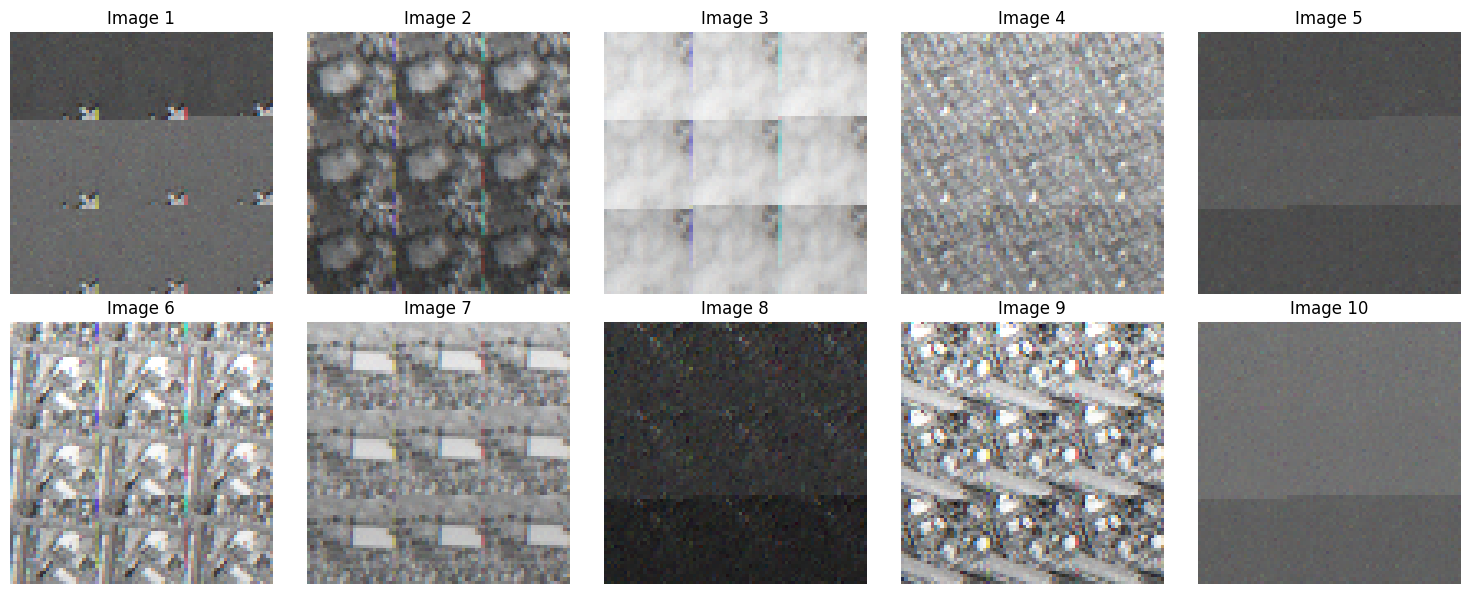

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame to get only the rows where the label is 0
no_ship_images = df[df['labels'] == 0].head(10)

# Set up the plot: 2 rows, 5 columns
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

# Plot the images
for i, ax in enumerate(axs.flatten()):
    # Extract and reshape the image data
    image = np.array(no_ship_images['data'].iloc[i]).reshape(80, 80, 3)
    ax.imshow(image)
    ax.set_title(f'Image {i+1}')
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()


In [9]:
df

,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007
...,...,...,...,...
3995,"[126, 122, 124, 138, 165, 186, 195, 199, 203, ...",0,"[-122.08693255500694, 37.77781408256089]",20170815_180821_102d
3996,"[130, 134, 139, 128, 117, 126, 141, 147, 142, ...",0,"[-122.10549691828378, 37.76946626247702]",20170730_191230_0f21
3997,"[171, 135, 118, 140, 145, 144, 154, 165, 139, ...",0,"[-122.48298739296371, 37.684929808845375]",20161116_180804_0e14
3998,"[85, 90, 94, 95, 94, 92, 93, 96, 93, 94, 94, 9...",0,"[-122.29028216570079, 37.71632091139081]",20170211_181116_0e16


In [10]:
# Count the occurrences of each label (0 and 1)
label_counts = df['labels'].value_counts()

# Print the counts
print(f"Label 0 (no-ship): {label_counts[0]} images")
print(f"Label 1 (ship): {label_counts[1]} images")

Label 0 (no-ship): 3000 images
Label 1 (ship): 1000 images
